<a href="https://colab.research.google.com/github/yeshwanth20011/Stock-Prediction-Using-LSTMS/blob/main/sop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data** **Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data/NSEI.csv')
df = df.set_index("Date") #setting index of data frame as the date attribute
df = df.dropna(axis=1,how='all') #drops rows which have null values
df2 = df['Close'] #chooses the Close price of the stocks for the estimation.
df2 = df2.dropna() #drops rows which have null values
df2.reset_index(drop = True)




In [ ]:
print(df2.shape) #gives dimensions of the data frame

(3676,)


In [ ]:
print(int((len(df2)*0.9))) #gives dimensions of the training data

3308


# **Splitting Data into train and test , and coverting into 2d_dataset**



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) #transforms each feature individually into the range 0 to 1.
df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1)) #number of rows are unknown but the number of columns is 1. ths function reshapes the array

train_size = int(len(df2)*0.9)  # 90% of df2 is given as training data
test_size = len(df2) - train_size  #remaining 10% is the testing data
train_data = df2[0:train_size, :]
test_data = df2[train_size : len(df2), :1]

def create_2d_dataset(dataset, time_step):  #for making dataset values into a matrix
    Xdata, Ydata = [], []
    for i in range(len(dataset)-time_step-1):
        record = dataset[i:(i+time_step), 0]
        Xdata.append(record)
        Ydata.append(dataset[i+time_step, 0])
    return np.array(Xdata), np.array(Ydata)

In [ ]:
time_step = 100
X_train, y_train = create_2d_dataset(train_data, time_step)
X_test, y_test = create_2d_dataset(test_data, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print((X_test))

[[[0.80828569]
  [0.80845758]
  [0.81580948]
  ...
  [0.89897045]
  [0.91338264]
  [0.90079991]]

 [[0.80845758]
  [0.81580948]
  [0.8183635 ]
  ...
  [0.91338264]
  [0.90079991]
  [0.88333651]]

 [[0.81580948]
  [0.8183635 ]
  [0.82267641]
  ...
  [0.90079991]
  [0.88333651]
  [0.89957204]]

 ...

 [[0.9096008 ]
  [0.90993224]
  [0.91255382]
  ...
  [0.95793604]
  [0.93825634]
  [0.95101389]]

 [[0.90993224]
  [0.91255382]
  [0.91217622]
  ...
  [0.93825634]
  [0.95101389]
  [0.95824001]]

 [[0.91255382]
  [0.91217622]
  [0.91312783]
  ...
  [0.95101389]
  [0.95824001]
  [0.9576383 ]]]


In [ ]:
print(X_train.shape)
print(X_test.shape)

(3207, 100, 1)
(267, 100, 1)


# **Model Creation**

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([    #sequential refers to a model that forms a cluster of layers that is stacked linearly
                    tf.keras.layers.LSTM(50, input_shape=(100, 1)),
                     tf.keras.layers.Dense(32, activation=tf.nn.relu),
                    tf.keras.layers.Dense(16, activation=tf.nn.relu), #Implements a dense NN # layer1
                    tf.keras.layers.Dense(8, activation=tf.nn.relu), #layer2
                    tf.keras.layers.Dense(1) #layer3

])
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dense_16 (Dense)            (None, 32)                1632      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Summary = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 100, verbose = 2)

Epoch 1/30
33/33 - 0s - loss: 3.7870e-05 - val_loss: 1.7725e-04 - 433ms/epoch - 13ms/step
Epoch 2/30
33/33 - 0s - loss: 3.6036e-05 - val_loss: 1.4046e-04 - 323ms/epoch - 10ms/step
Epoch 3/30
33/33 - 0s - loss: 3.5887e-05 - val_loss: 1.4010e-04 - 336ms/epoch - 10ms/step
Epoch 4/30
33/33 - 0s - loss: 3.5401e-05 - val_loss: 1.3304e-04 - 286ms/epoch - 9ms/step
Epoch 5/30
33/33 - 0s - loss: 3.4393e-05 - val_loss: 1.6283e-04 - 239ms/epoch - 7ms/step
Epoch 6/30
33/33 - 0s - loss: 3.9431e-05 - val_loss: 1.9411e-04 - 217ms/epoch - 7ms/step
Epoch 7/30
33/33 - 0s - loss: 3.9507e-05 - val_loss: 1.3259e-04 - 213ms/epoch - 6ms/step
Epoch 8/30
33/33 - 0s - loss: 3.9075e-05 - val_loss: 1.3389e-04 - 211ms/epoch - 6ms/step
Epoch 9/30
33/33 - 0s - loss: 3.4670e-05 - val_loss: 2.3665e-04 - 231ms/epoch - 7ms/step
Epoch 10/30
33/33 - 0s - loss: 4.1410e-05 - val_loss: 1.5323e-04 - 228ms/epoch - 7ms/step
Epoch 11/30
33/33 - 0s - loss: 3.4733e-05 - val_loss: 1.5027e-04 - 220ms/epoch - 7ms/step
Epoch 12/30
33/3

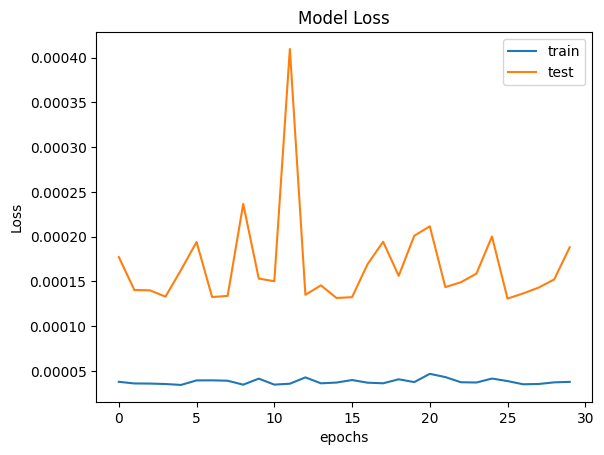

In [ ]:
plt.plot(Summary.history['loss'])
plt.plot(Summary.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# **Evaluating the model through plots and mean squared error**

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print(f'MSE: {mse}')

9/9 [==============================] - 0s 4ms/step
MSE: 0.00018824363844745622


In [ ]:
lookback = 100
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + lookback*2 + 1: len(df2)-1, :] = test_predict

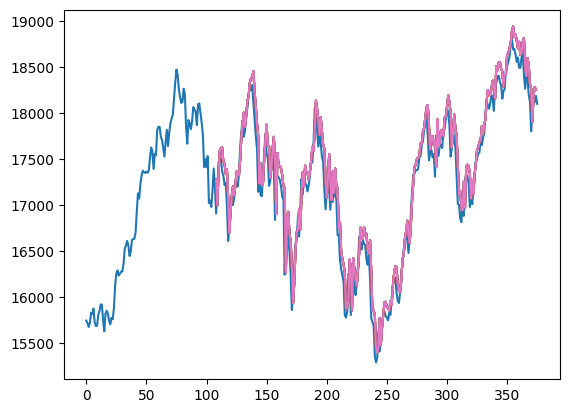

In [ ]:
plt.plot((scaler.inverse_transform(df2))[3300:3676, :])
plt.plot(testPredictPlot[3300:3676, :])
plt.show()